In [209]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import pandas as pd

### Уровень 0

#### Задание 1

Придумайте матрицы, которые обладают следующими свойствами:  
a) диагональная, ортогональная, но не единичная(!);  
b) верхнетреугольная, ортогональная;  
c) нижнетреугольная, ортогональная;   
d) матрица, у которой определитель = 1, и все элементы не равны 0;  
P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!  

Диагональная, ортогональная, но не единичная(!):

In [62]:
A = np.diag([-1, -1])

In [63]:
A

array([[-1,  0],
       [ 0, -1]])

Определитель ортогональной матрицы равен либо +1 либо (−1).

In [64]:
det_A = np.linalg.det(A)
det_A

1.0

Проверка:

$ P \cdot P^T = I $

In [65]:
A_tr = np.transpose(A)

In [66]:
I = A @ A_tr

In [67]:
I

array([[1, 0],
       [0, 1]])

Верхнетреугольная, ортогональная:

Диагональная матрица является одновременно и верхней треугольной, и нижней треугольной:

In [68]:
B = np.diag([-1, -1, -1])

In [72]:
B_tr = np.transpose(B)
I = B @ B_tr
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [73]:
det_B = np.linalg.det(B)
det_B

-1.0

Нижнетреугольная, ортогональная:

In [75]:
С = np.diag([-1, -1, -1, -1])

In [76]:
С_tr = np.transpose(С)
I = С @ С_tr
I

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [77]:
det_С = np.linalg.det(С)
det_С

1.0

Матрица, у которой определитель = 1, и все элементы не равны 0:

In [79]:
D = np.array([[1/3, 2/3, -2/3],
              [-2/3, 2/3, 1/3],
              [2/3, 1/3, 2/3]])

In [80]:
det_D = np.linalg.det(D)
det_D

1.0

#### Задание 2

Найдите собственные значения и собственные вектора матриц:

In [82]:
M = np.array([[2, 2],
              [1, 3]])
print(M)

[[2 2]
 [1 3]]


In [83]:
w, v = np.linalg.eig(M)

In [84]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1

#### Задание 1

Найдите спектральное разложение матрицы:

In [90]:
N = np.array([[1, 2],
              [2,3]])
print(N)

[[1 2]
 [2 3]]


In [97]:
n, U = np.linalg.eig(N)

Ортогональная матрица:

In [94]:
U

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

Транспонированная ортогональная матрица:

In [102]:
U_tr = np.transpose(U)
U_tr

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

Собственные значения:

In [98]:
n

array([-0.23606798,  4.23606798])

Диагональная матрица, составленная из собственных значений матрицы N

In [99]:
np.diag(n)

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

Проверка:

In [103]:
print(np.array(U.dot(np.diag(n)).dot(U_tr)))

[[1. 2.]
 [2. 3.]]


#### Задание 2

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.

In [120]:
X, y = load_digits(return_X_y=True)

In [125]:
X.shape

(1797, 64)

In [122]:
X, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

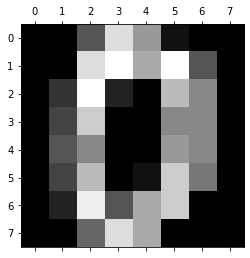

In [177]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [199]:
len_X = len(X)

In [235]:
mse = []
for i in range(1, 9):
    se_sum = 0
    for j in range(0, len_X):
        image = X[j]
        image = image.reshape((8, 8))
        
        pca = PCA(n_components = i)
        pca.fit(image)
        image_1 = pca.transform(image)
        image_2 = pca.inverse_transform(image_1)
        
        se = mean_squared_error(image, image_2)
        se_sum += se
    
    mse.append(se_sum / len_X)

In [210]:
mse_df = pd.DataFrame(mse, columns = ['mse'])

In [214]:
pca_num = list(range(1,9))

In [216]:
pca_num_df = pd.DataFrame(pca_num, columns = ['pca_num'])

In [219]:
data = pca_num_df.join(mse_df)

In [220]:
data

,pca_num,mse
0,1,6.543179e+00
1,2,2.471298e+00
2,3,7.630356e-01
3,4,1.664597e-01
4,5,2.053486e-02
5,6,1.515602e-04
6,7,9.469143e-30
7,8,9.469514e-30


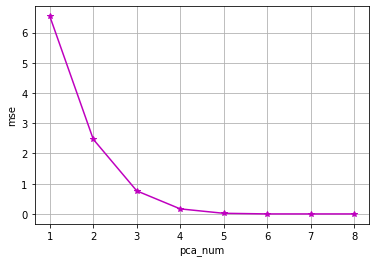

In [234]:
plt.plot(data.pca_num, data.mse, 'm-*')
plt.xlabel('pca_num')
plt.ylabel('mse')
plt.grid()

 В целом, 4-х компонент достаточно